# Explore here

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer, KNNImputer

import pickle

In [74]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv'

pd.read_csv(url).to_csv('../data/raw/diabetes.csv')

In [75]:
df = pd.read_csv('../data/raw/diabetes.csv').drop(['Unnamed: 0'], axis = 1).drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
df.shape

(768, 9)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


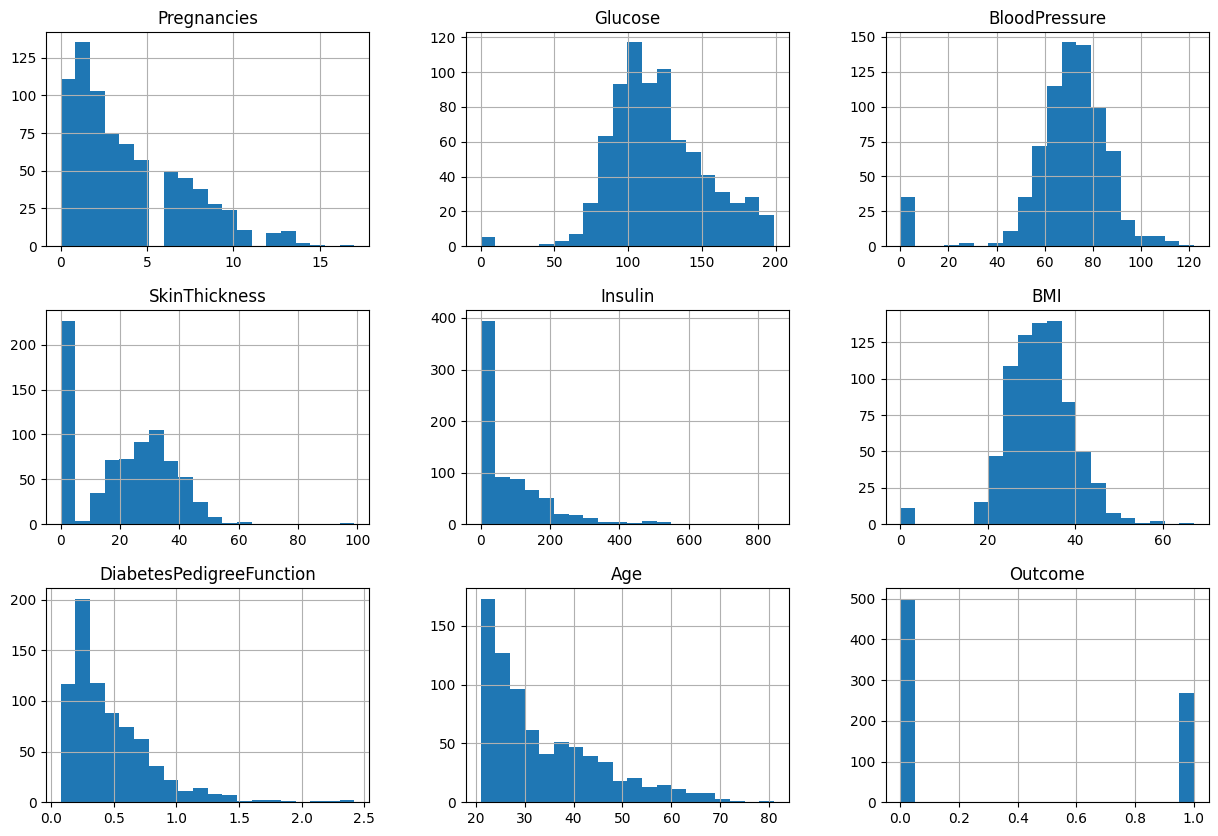

In [78]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.show()

In [79]:
sorted(df['Pregnancies'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(17)]

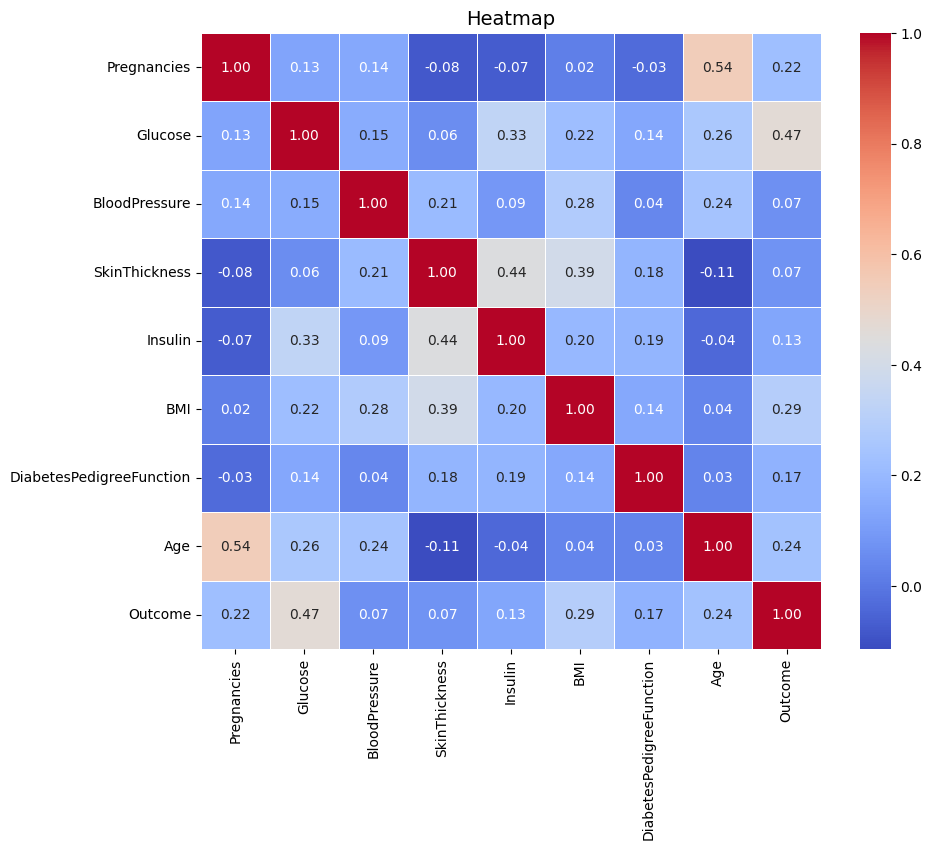

In [80]:
# Correlation matrix
corr = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap", fontsize=14)
plt.show()

In [81]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

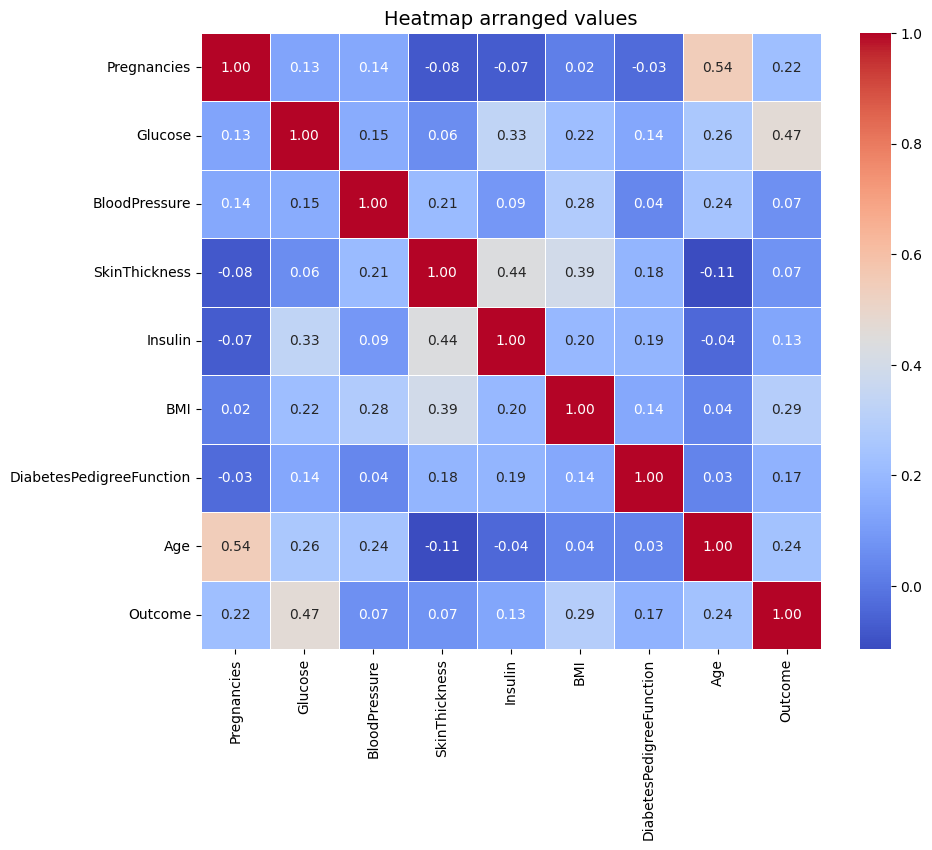

In [82]:
corr = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap arranged values", fontsize=14)
plt.show()

We can see now bmi and skinThikness has more correlation

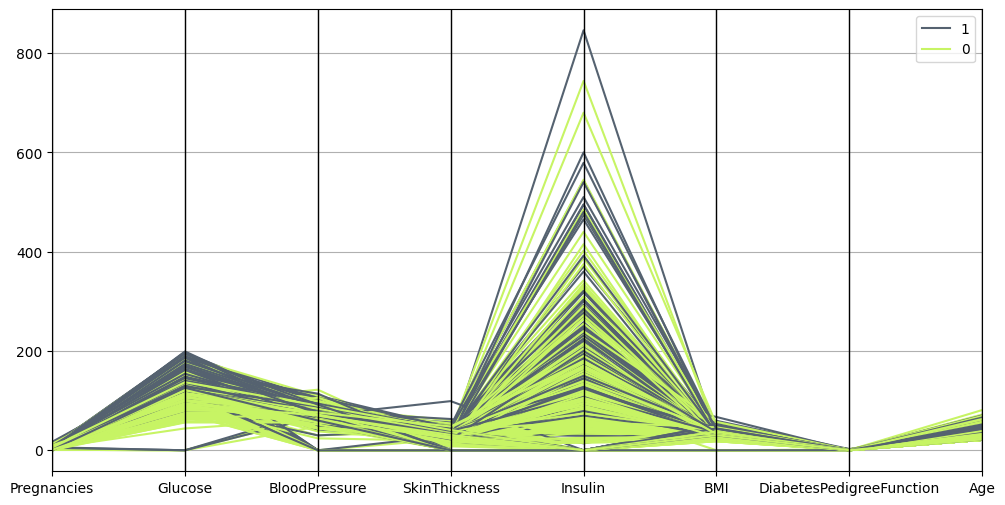

In [83]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color= ('#556270','#C7F464'))

plt.show()

In [84]:
df.shape

(768, 9)

In [85]:
#looking for the best columns to use in the random forest model
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
features = selected_features.tolist()
features

['Glucose', 'BMI', 'Age']

In [86]:
#train test

#X = df.drop(['Outcome', 'Pregnancies','BloodPressure', 'SkinThickness', 'Insulin'], axis=1) #features dropped bassed on correlation and EDA
X = df[features] #features selected based on feature selection
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [87]:
#substitute median where value is 0
cols_with_zero_missing = features
X_train[cols_with_zero_missing] = X_train[cols_with_zero_missing].replace(0, np.nan)
X_test[cols_with_zero_missing] = X_test[cols_with_zero_missing].replace(0, np.nan)


# Alternatively, using KNN Imputer 
imputer = KNNImputer(n_neighbors= 5) #KNN uses the mean of the nearest neighbors to impute missing values
imputer.fit(X_train[cols_with_zero_missing])
X_train[cols_with_zero_missing] = imputer.transform(X_train[cols_with_zero_missing])
X_test[cols_with_zero_missing] = imputer.transform(X_test[cols_with_zero_missing])


In [88]:
'''
#looking for kbest
selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train = selection_model.transform(X_train)
X_test = selection_model.transform(X_test)
'''

'\n#looking for kbest\nselection_model = SelectKBest(f_classif, k = 8)\nselection_model.fit(X_train, y_train)\n\nselected_columns = X_train.columns[selection_model.get_support()]\nX_train = selection_model.transform(X_train)\nX_test = selection_model.transform(X_test)\n'

In [89]:

#scaler
#This model is better without scaler

scaler = StandardScaler()  

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [90]:
# Decision tree
tree = DecisionTreeClassifier(random_state=42)


tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
y_pred = tree.predict(X_test)

In [92]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6818181818181818
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        99
           1       0.55      0.64      0.59        55

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.69       154



In [93]:
hyperparams = {
    "criterion": ["gini", "entropy", "log_loss"],                
    "max_depth": [3, 5, 8, 12,None],               
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"],        
    "class_weight": [None, "balanced"],            
    "ccp_alpha": [0.0, 0.001, 0.01, 0.05, 0.1]     
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(tree, hyperparams, scoring = "accuracy", cv = cv, n_jobs= -1)

grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy', ...], 'max_depth': [3, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [94]:
best_params = grid.best_params_ 
print(best_params)

{'ccp_alpha': 0.01, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [95]:
tree = DecisionTreeClassifier(**best_params, random_state= 42)

tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [96]:
y_pred = tree.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7012987012987013
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [97]:
#save model

with open('../models/decision_tree_model.pkl', 'wb') as archive:
    pickle.dump(tree, archive)

In [98]:
random_forest = RandomForestClassifier(random_state= 42)

random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [99]:
y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [100]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=random_forest,
    param_grid=param_grid,
    cv= cv,
    n_jobs= -1,
    scoring= 'accuracy')

grid.fit(X_train, y_train)

best_params = grid.best_params_

In [101]:
random_forest = RandomForestClassifier(**best_params, random_state= 42)

random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7792207792207793
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

